# Днес ще говорим за:

* Невронните мрежи и техните свойства
* Многослоен персептрон (Multilayer perceptron) 
* Активационни функции
* Обратно разпространение на сигнала (Backpropagation)

In [110]:
import math

import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

%matplotlib inline
sns.set()

# Защо невронни мрежи?

## Лесна задачка - на картинката куче или котка виждаме?
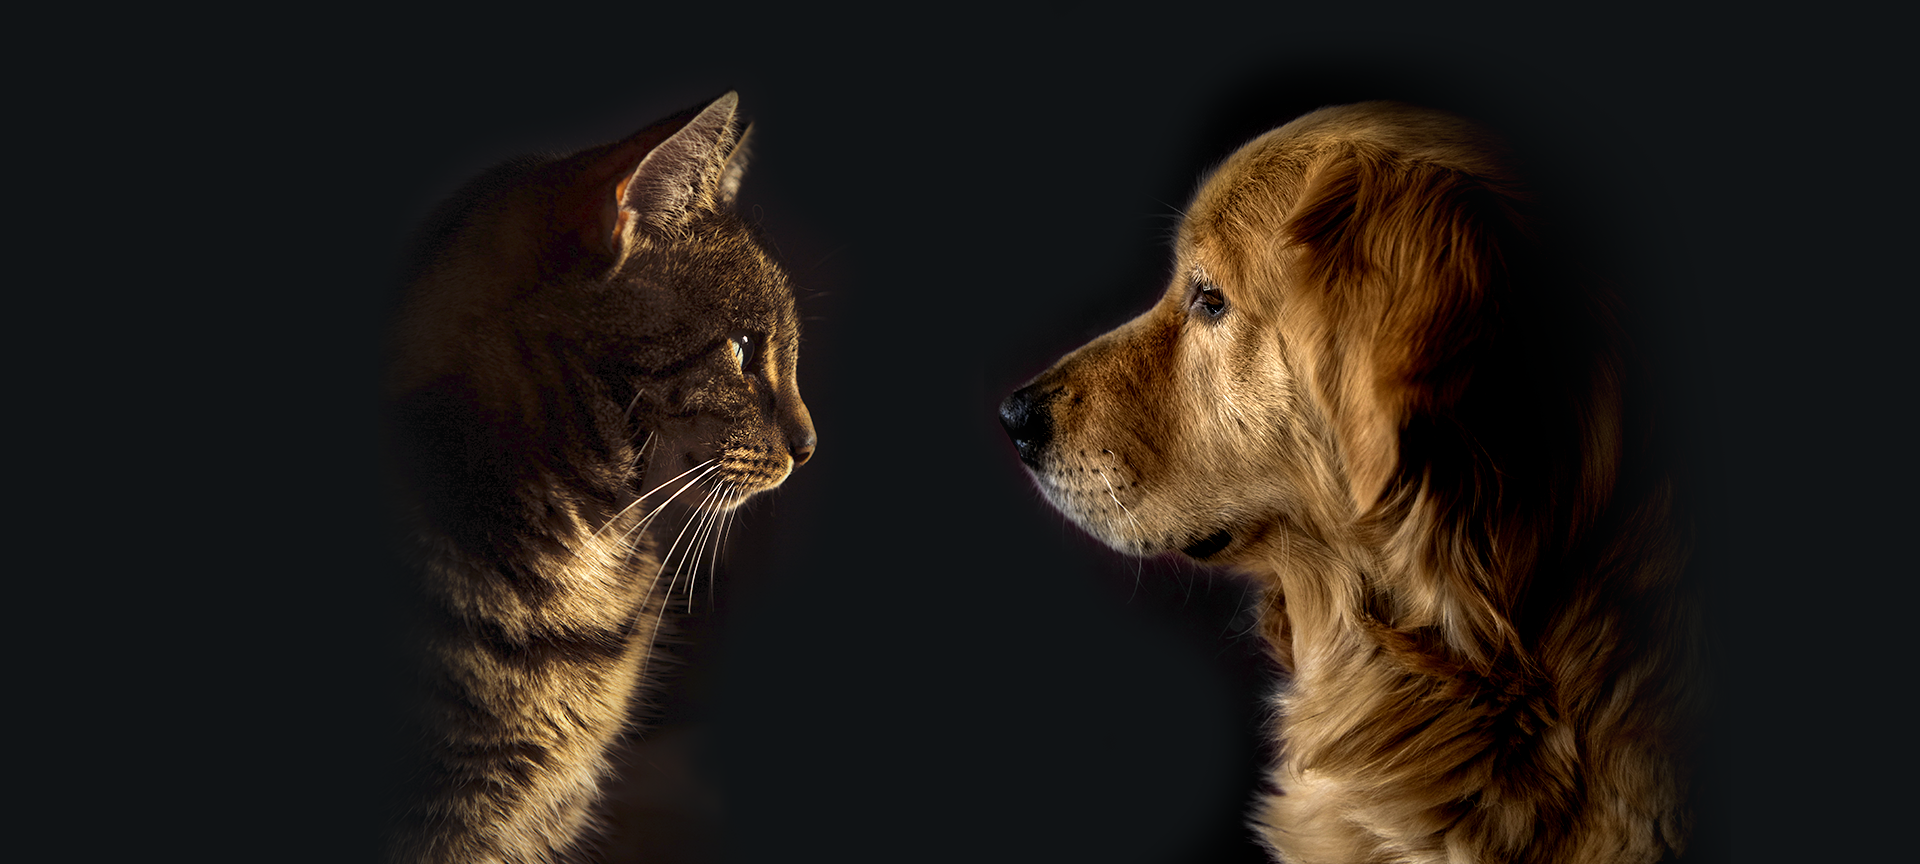

Ако трябваше да пишем дърво на решенията, то какви щяха да са възлите? 
- Остри ли са му ушите? (Немската овчарка има остри уши)
- Има ли мустаци? (Котките имат мустаци)
- Колко е голямо животното? (Йоркширският териер е малък)

### Проблемът - feature engineering
Традиционните методи са толкова добри, колкото и features-ите, които сме избрали 
Трябва ръчно да сметнем големината на ушите, цветовете на носовете и т.н. - какво става ако променим ъгъла или светлината на снимката?

### "Как да опиша данните" -> "Как да науча модела да си намери сам добри описания на данните?"


# Как работят невронните мрежи (Neural networks, NN)? 

Този модел на обработка на информацията е вдъхновен от структурата на мозъка на биологичните организми: невронът приема сигнали от невроните, с които е свързан, обработва ги и предава информация на свързаните с него неврони от мрежата. 

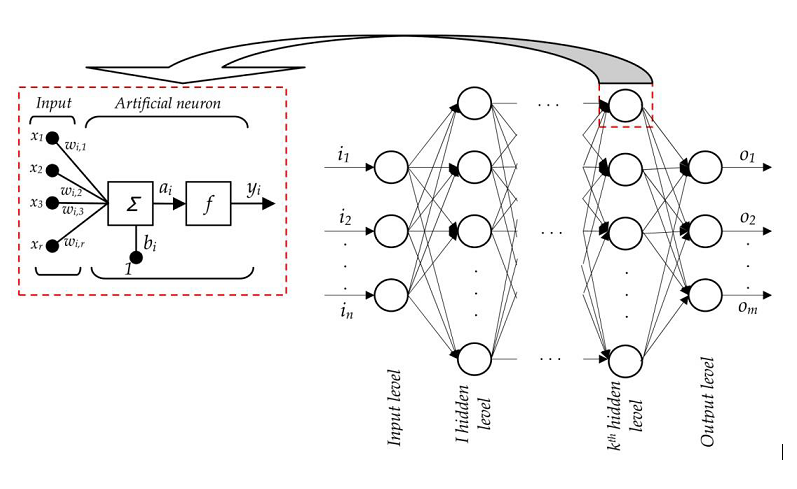

Всеки неврон (напр. $i$ –тият от даден слой или ниво) събира всичката входна информация ($x_j$) към него, обобщава я с определени тегла (${w_i,_j}$), обработва междинния резултат ($a_i$) чрез активиращата функция ($f$) и предава резултата ($y_i$) на всички свързани с него неврони от следващия слой. 
Към входните данни се добавя отклонение ($b_i$, bias), чиято тежест е 1 (така се избягва случаят всички тегла да са нула).


 Невронната мрежа се формира от три типа слоеве:    
- **Входен слой (Input layer)**: Невроните от този слой приемат наблюденията ($i_1$, $i_2$, … , $i_n$). На всеки входен елемент се съпоставя тегло съответно на неговата значимост. (Теглата са въведени по подобие на синаптичните импулси, предавани между биологичните неврони. Отрицателна стойност на теглото съответства на потискащ импулс, а положителна – на възбуждащ.)
- **Скрити слоеве (Hidden layers)**: Това са междинните слоеве между входа и изхода, които помагат на невронната мрежа да научи сложните взаимоотношения, свързани с данните (в някои случаи тези слоеве може да не съществуват); 
- **Изходен слой (Output layer)**: Невроните от този слой извличат крайния резултат ($o_1$, $o_2$, … , $o_m$) от предишните два слоя. 


# Защо ни трябват невронни мрежи?

In [111]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

## Логистична регресия (Logistic regression)

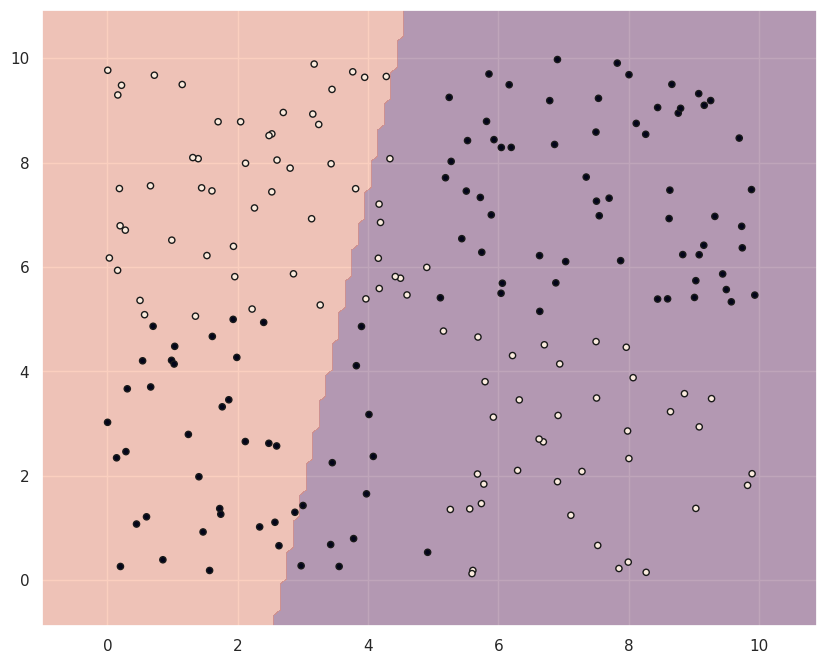

In [ ]:
np.random.seed(1)
X = np.random.rand(200, 2) * 10
y = np.logical_xor(X[:, 0] > 5, X[:, 1] > 5)

lr = LogisticRegression().fit(X, y)
plot_boundary(lr, X, y)

## Невронни мрежи

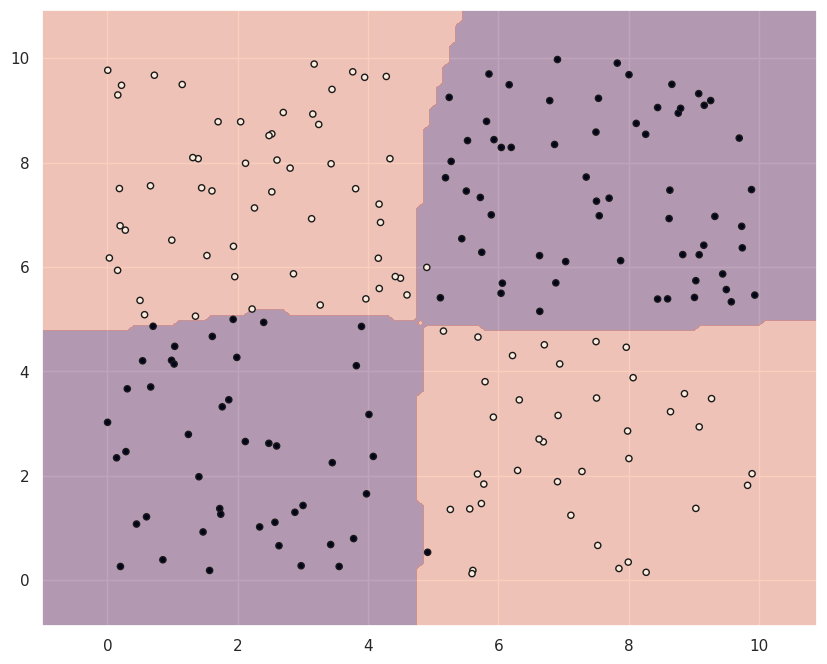

In [113]:
mlp = MLPClassifier(100, max_iter=2000, random_state=1).fit(X, y)
plot_boundary(mlp, X, y)

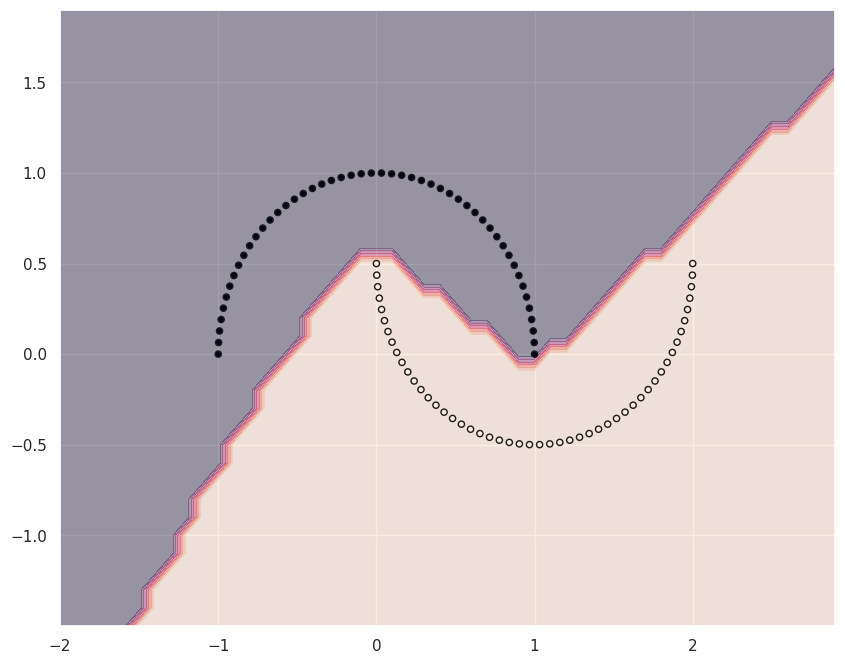

In [114]:
X, y = make_moons()
plot_boundary(mlp.fit(X, y), X, y)

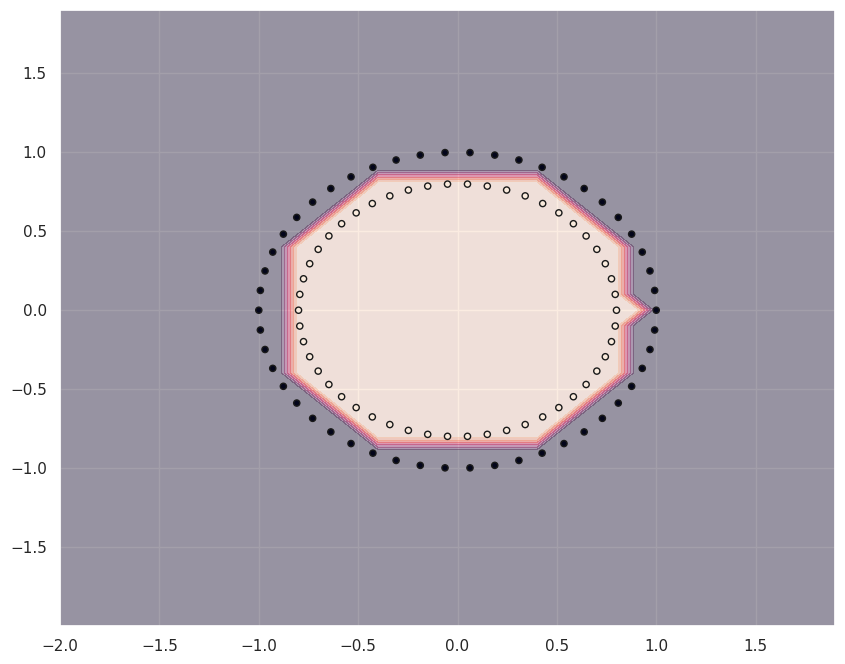

In [115]:
X, y = make_circles()
plot_boundary(mlp.fit(X, y), X, y)

Ясно - Невронните мрежи могат да апроксимират всяка функция.

Да видим обаче какво стои зад `MLP`.

In [116]:
mlp

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

Повече - в [документацията в sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

### Защо сега? (Мотивация)

- **Данни (Data):** Най-накрая имаме достатъчно етикирани данни (снимки, текст), за да обучим тези масивни мрежи.
- **Изчислителна мощ (Compute):** Имаме графични процесори (GPU), които могат да извършват необходимите матрични операции.
- **Производителност:** За структурирани данни (Excel таблици), традиционното ML често е достатъчно. Но за **неструктурирани данни** (Изображения, Аудио, Текст), Невронните мрежи са безспорният лидер (State-of-the-art).

# Разпознаване на цифри
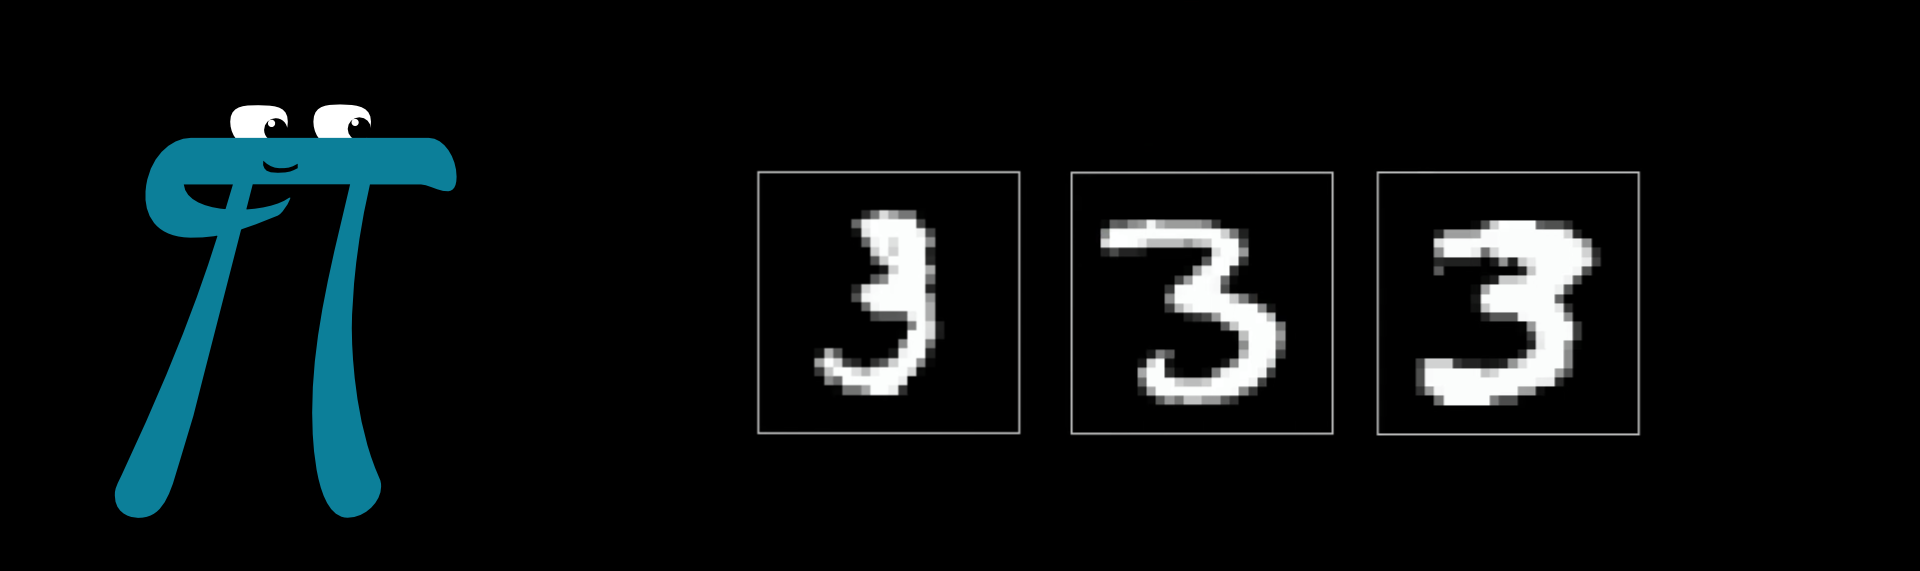

# 1. Анатомия на входа: Пикселите са числа

* Всяко изображение от базата данни MNIST е решетка **28x28 пиксела**.
* Всеки пиксел има стойност за яркост (наситеност) между **0 (черно)** и **1 (бяло)**. (MNIST използва стойности от 0 до 255, но ги нормализираме към [0, 1] за по-лесна работа.)
* Ние наричаме тази стойност **"Активация" ($a$)**.

Когато видите числото **7**, компютърът вижда матрица от 784 числа (28 * 28).

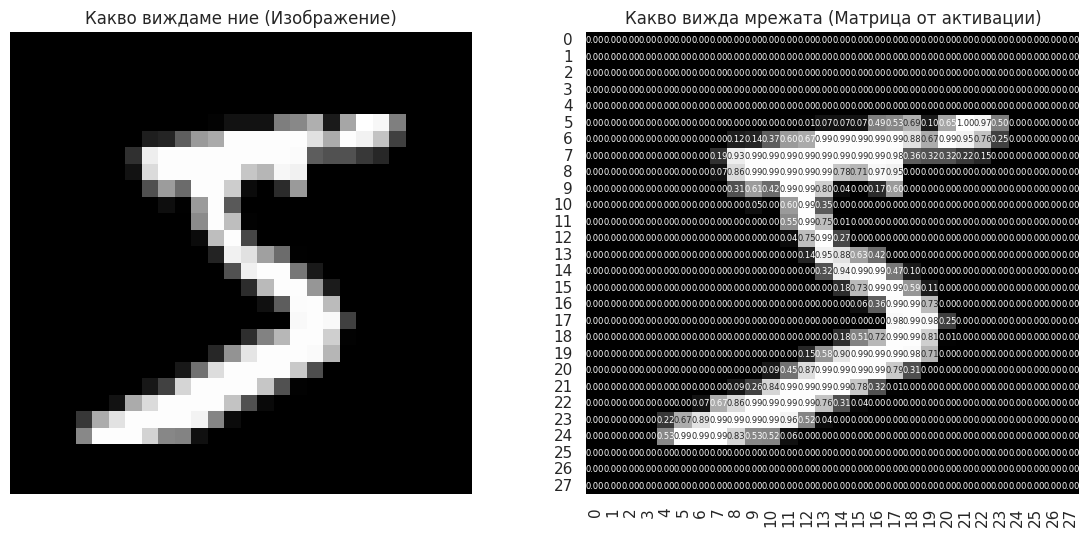

Примерна стойност на пиксел (ред 14, колона 14): 0.9411764705882353


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"], mnist["target"]
digit = X.iloc[0].values.reshape(28, 28) # Взимаме първата цифра (обикновено е 5)
digit = digit / 255.0  # Нормализираме стойностите към [0, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Като картинка
axes[0].imshow(digit, cmap='gray')
axes[0].set_title("Какво виждаме ние (Изображение)")
axes[0].axis('off')

# 2. Като "Heatmap" с числата
sns.heatmap(digit, annot=True, fmt='.2f', cmap='gray', ax=axes[1], cbar=False, 
            annot_kws={'size': 6})
axes[1].set_title("Какво вижда мрежата (Матрица от активации)")
plt.show()

print(f"Примерна стойност на пиксел (ред 14, колона 14): {digit[14][14]}")

# 2. Разопаковане (Flattening)
Невронната мрежа (в най-простата си форма - MLP) не разбира от "горе" и "долу". Тя иска един дълъг списък от числа.

* Взимаме 28-те реда на картинката и ги залепяме един след друг.
* Получаваме един дълъг вектор с **784 неврона**.
* Това е нашият **Входящ слой (Input Layer)**.

Представете си, че "разплитаме" пуловера, за да получим една дълга нишка.

Форма на оригиналната картинка: (28, 28)
Форма на входа за мрежата: (784,) (784 неврона)


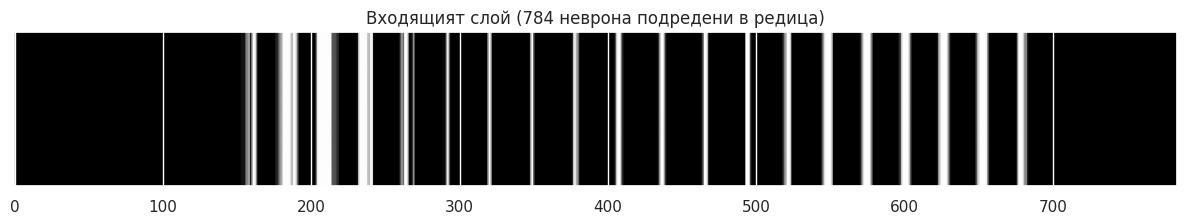

100 стойности на входния слой:
Неврон 140: 0.00
Неврон 141: 0.00
Неврон 142: 0.00
Неврон 143: 0.00
Неврон 144: 0.00
Неврон 145: 0.00
Неврон 146: 0.00
Неврон 147: 0.00
Неврон 148: 0.00
Неврон 149: 0.00
Неврон 150: 0.00
Неврон 151: 0.00
Неврон 152: 0.01
Неврон 153: 0.07
Неврон 154: 0.07
Неврон 155: 0.07
Неврон 156: 0.49
Неврон 157: 0.53
Неврон 158: 0.69
Неврон 159: 0.10
Неврон 160: 0.65
Неврон 161: 1.00
Неврон 162: 0.97
Неврон 163: 0.50
Неврон 164: 0.00
Неврон 165: 0.00
Неврон 166: 0.00
Неврон 167: 0.00
Неврон 168: 0.00
Неврон 169: 0.00
Неврон 170: 0.00
Неврон 171: 0.00
Неврон 172: 0.00
Неврон 173: 0.00
Неврон 174: 0.00
Неврон 175: 0.00
Неврон 176: 0.12
Неврон 177: 0.14
Неврон 178: 0.37
Неврон 179: 0.60
Неврон 180: 0.67
Неврон 181: 0.99
Неврон 182: 0.99
Неврон 183: 0.99
Неврон 184: 0.99
Неврон 185: 0.99
Неврон 186: 0.88
Неврон 187: 0.67
Неврон 188: 0.99
Неврон 189: 0.95
Неврон 190: 0.76
Неврон 191: 0.25
Неврон 192: 0.00
Неврон 193: 0.00
Неврон 194: 0.00
Неврон 195: 0.00
Неврон 196: 0.00


In [ ]:
flat_digit = digit.flatten()
print(f"Форма на оригиналната картинка: {digit.shape}")
print(f"Форма на входа за мрежата: {flat_digit.shape} (784 неврона)")

plt.figure(figsize=(15, 2))
plt.imshow(flat_digit.reshape(1, -1), cmap='gray', aspect='auto')
plt.title("Входящият слой (784 неврона подредени в редица)")
plt.yticks([])
plt.show()
print("100 стойности на входния слой:")
print("\n".join([f"Неврон {140+i}: {val:.2f}" for i, val in enumerate(flat_digit[140:230])]))


# 3. Как работи един неврон от следващия слой?

Представете си, че един неврон във втория слой има за задача да открие **"хоризонтална черта в средата"** (като тази в цифрата 7 или 4).

Как прави това?
1.  Той е свързан с всички 784 пиксела от входа.
2.  Всяка връзка има **Тегло (Weight, $w$)**.
    * **Положително тегло:** "Ако този пиксел свети, аз се радвам." 
    * **Отрицателно тегло:** "Ако този пиксел свети, аз НЕ трябва да се активирам."
    * **Нулево тегло:** "Не ме интересува този пиксел."

**Математиката е проста:**
$$Weighted Sum = (a_1 \cdot w_1) + (a_2 \cdot w_2) + ... + (a_{784} \cdot w_{784})$$

След това добавяме **Bias (Праг)** и прилагаме функция (Sigmoid/ReLU), за да сместим резултата между 0 и 1.

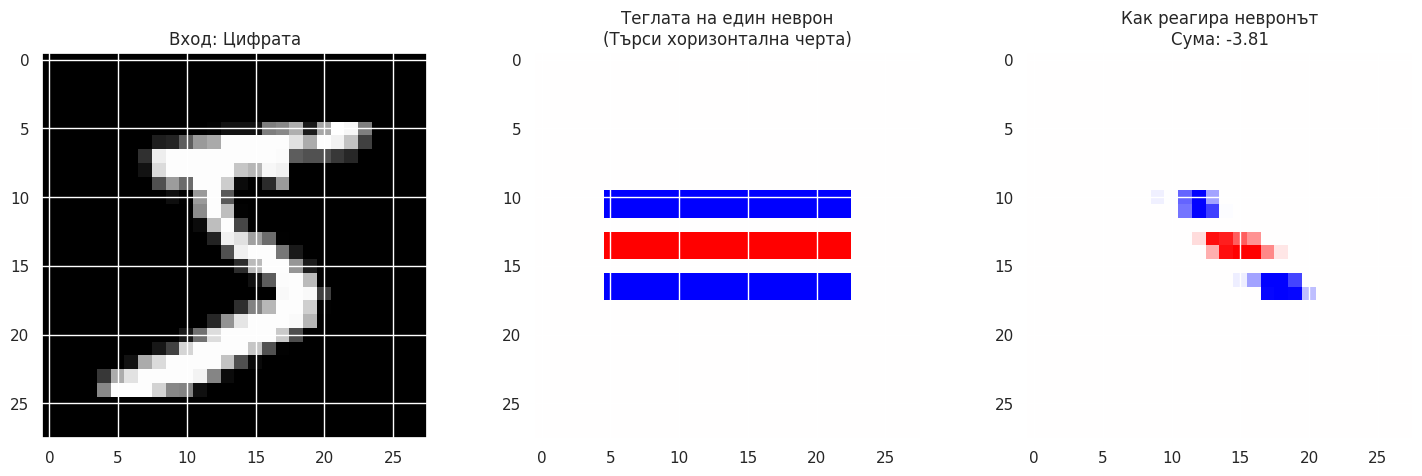

In [143]:
# Създаваме РЪЧНО филтър (тегла), който търси хоризонтална линия в средата

weights_detector = np.zeros((28, 28))

# Задаваме положителни тегла за средните редове (търсим мастило там)
weights_detector[13:15, 5:23] = 1.0  

# Задаваме отрицателни тегла около тях (за да сме сигурни, че е тънка линия, а не петно)
weights_detector[10:12, 5:23] = -1.0 
weights_detector[16:18, 5:23] = -1.0

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].imshow(digit, cmap='gray')
ax[0].set_title("Вход: Цифрата")

# 2. Теглата (Филтърът)
# Червено = Отрицателно, Синьо = Положително
ax[1].imshow(weights_detector, cmap='bwr', vmin=-1, vmax=1)
ax[1].set_title("Теглата на един неврон\n(Търси хоризонтална черта)")

# 3. Резултатът (Умножение пиксел по пиксел)
activation_map = digit * weights_detector
ax[2].imshow(activation_map, cmap='bwr', vmin=-1, vmax=1)
ax[2].set_title(f"Как реагира невронът\nСума: {np.sum(activation_map):.2f}")

plt.show()

Подредете изображенията на база колко биха активирали неврона отгоре:
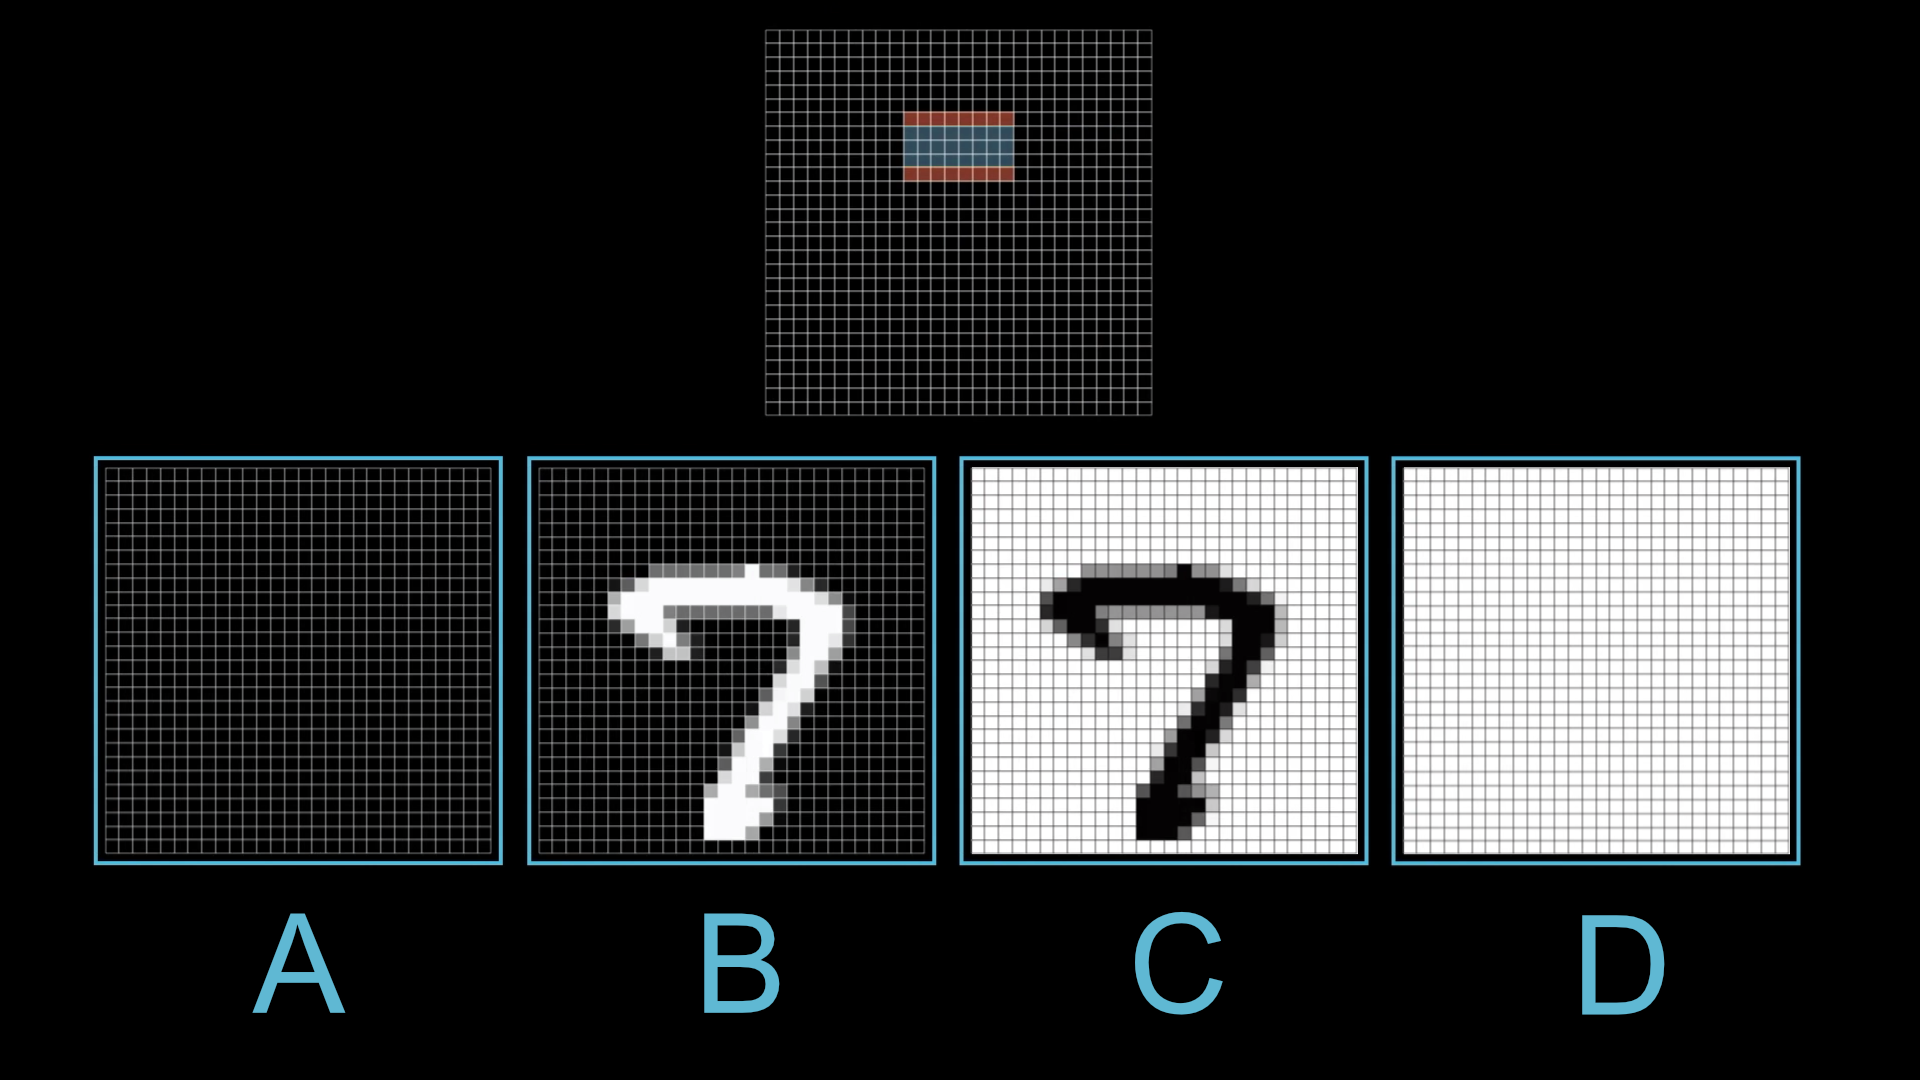

**Подредете изображенията на база колко биха активирали неврона:**

- **B** дава най-висока активация, защото активира само невроните с положителни тегла.
- **D** дава втора по сила активация, тъй като активира 24 положителни тегла, но само 16 отрицателни.
- **A** има претеглена сума от нула, защото всички входни неврони са изключени.
- **C** дава най-ниска активация, защото е точно обратното на B - активира всички отрицателни тегла.

**Подредба: B > D > A > C**


# 4. Bias и Активация

Видяхме сумата от умноженията. Но тази сума може да бъде всякакво число (напр. 543 или -20).
Невроните обаче работят с числа между 0 и 1 (активиран или не).

Тук идва ролята на **Bias ($b$)**:
* Bias е като праг на чувствителност.
* Ако Bias е **-10**, сумата от пикселите трябва да е поне 10, за да стане резултатът положителен.
* "Колко силно трябва да свети шаблонът, за да се включи невронът?"

Накрая прилагаме функция (напр. Sigmoid), която "смачква" (squishification) резултата в интервала $(0, 1)$.

In [120]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

weighted_sum = np.sum(digit * weights_detector)
bias = -5 # Пример: Трябва ни доста силно съвпадение

# Формулата на един неврон
z = weighted_sum + bias
activation = sigmoid(z)

print(f"Претеглена сума: {weighted_sum:.2f}")
print(f"С добавен Bias: {z:.2f}")
print(f"Финална активация на неврона: {activation:.4f}")

if activation > 0.5:
    print("--> Невронът Е АКТИВЕН! (Открихме хоризонтална линия)")
else:
    print("--> Невронът СПИ.")

Претеглена сума: -3.81
С добавен Bias: -8.81
Финална активация на неврона: 0.0001
--> Невронът СПИ.


# 5. Сглобяване на всичко
Това, което направихме, беше за **един единствен неврон**.
Дълбоката невронна мрежа прави следното:

1.  **Слой 1:** Множество неврони откриват малки парченца (чертички, ъгълчета) чрез различни тегла.
2.  **Слой 2:** Комбинира тези чертички, за да открие форми (кръгче, плюсче).
3.  **Слой 3:** Комбинира формите, за да разпознае цифрата.

Магията на Deep Learning е, че ние **не пишем теглата ръчно**. Ние стартираме със случайни тегла и алгоритъмът ги настройва сам чрез **Backpropagation**.

Да сметнем колко са теглата и bias-овете в една такава мрежа?

# 6. Функцията на цената (Cost Function)

В началото нашата мрежа е инициализирана със **случайни тегла**. Това означава, че тя е "глупава". Ако ѝ покажем снимка на **3**, тя може да извика: *"Това е 8!"* или *"Това е 0!"*.

За да я обучим, първо трябва да можем да измерим **колко точно греши тя**.

* **Идеалният отговор:** Вектор, в който само позицията за "3" е 1.0, а другите са 0.
* **Отговорът на мрежата:** Някакви случайни числа (напр. 0.2 за "3", но 0.8 за "8").

**Функцията на цената (Cost Function)** е математически начин да сравним тези два вектора. Най-често използваме **Mean Squared Error (MSE)**:
$$Cost = (Prediction - Target)^2$$

Целта на цялото обучение е една: **Да направим този Cost (Цена) възможно най-близък до Нула.**

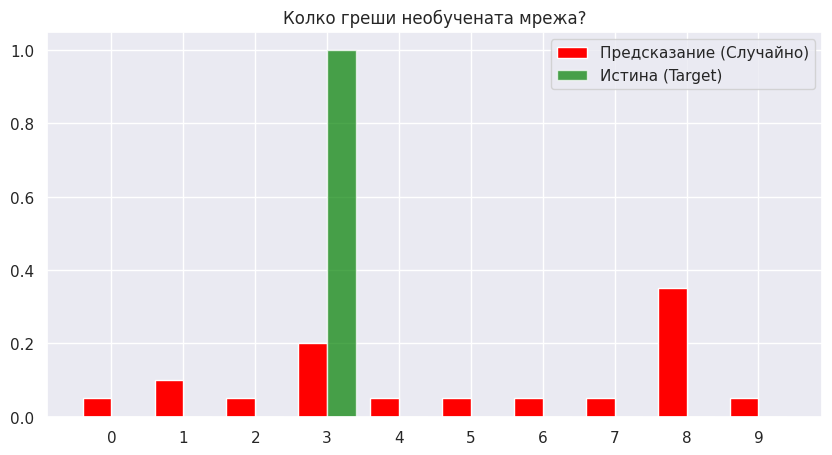

Cost (Цената на грешката): 0.7900
Нашата цел: Да променим теглата така, че това число да стане 0.


In [121]:
# Имитираме изхода на необучена мрежа за цифрата '3'
# Стойностите са случайни (softmax вероятности)
prediction_random = np.array([0.05, 0.1, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05, 0.35, 0.05])

# Идеалният отговор (One-hot encoding за цифрата 3)
target_ideal = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

# Визуализация на грешката
labels = [str(i) for i in range(10)]
x = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, prediction_random, 0.4, label='Предсказание (Случайно)', color='red')
plt.bar(x + 0.2, target_ideal, 0.4, label='Истина (Target)', color='green', alpha=0.7)

plt.xticks(x, labels)
plt.title("Колко греши необучената мрежа?")
plt.legend()
plt.show()

# Изчисляване на Cost (Mean Squared Error)
cost = np.sum((prediction_random - target_ideal)**2)
print(f"Cost (Цената на грешката): {cost:.4f}")
print("Нашата цел: Да променим теглата така, че това число да стане 0.")

# 7. Градиентно спускане: Слизане в долината

Представете си, че **Функцията на цената** е огромен планински пейзаж с долини и върхове.

* Височината на планината е нашата **Грешка (Cost)**.
* Нашите координати (къде стъпваме) са **Теглата и Bias-ите**.

Ние искаме да стигнем до най-ниската точка на долината (минимална грешка).
Проблемът? Ние сме "слепи". Не виждаме цялата планина.

**Решението:**
Опипваме с крак наклона под нас (**Градиента**) и правим една крачка надолу.
* Ако наклонът е стръмен, правим голяма крачка.
* Ако е равен, правим малка крачка.

Това се повтаря хиляди пъти:
$$w_{new} = w_{old} - (LearningRate \cdot Gradient)$$

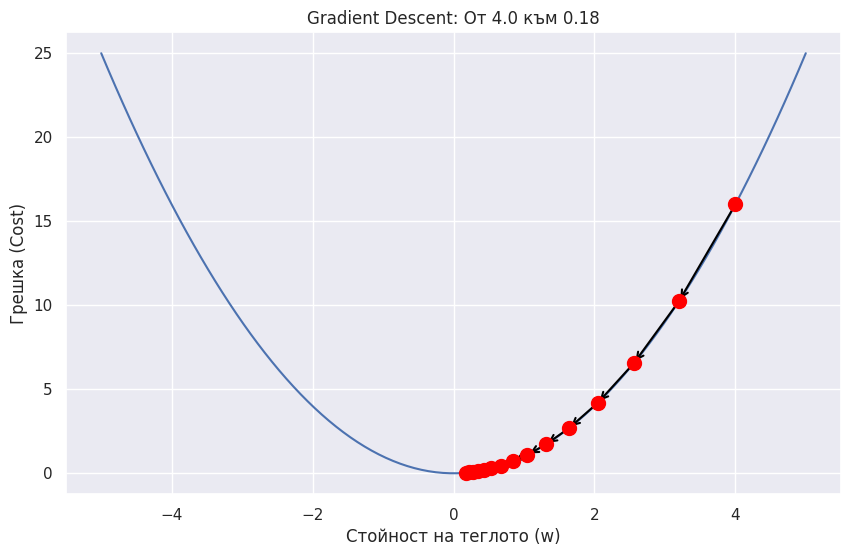

In [122]:
# Опростен пример: Намиране на минимум на функцията y = x^2 (парабола)

def cost_function(w):
    return w ** 2  # Най-простата "чаша"

def gradient(w):
    return 2 * w  # Производната на w^2 е 2w

current_weight = 4.0  # Започваме от грешна позиция (високо в планината)
learning_rate = 0.1   # Размер на стъпката
history = []

for i in range(15):
    grad = gradient(current_weight)
    
    history.append((current_weight, cost_function(current_weight)))

    current_weight = current_weight - (learning_rate * grad)

weights_hist, costs_hist = zip(*history)
x_vals = np.linspace(-5, 5, 100)
y_vals = cost_function(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Функция на цената (Error Surface)")
plt.scatter(weights_hist, costs_hist, color='red', s=100, zorder=5)

for i in range(len(weights_hist)-1):
    plt.annotate('', xy=(weights_hist[i+1], costs_hist[i+1]), 
                 xytext=(weights_hist[i], costs_hist[i]),
                 arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.title(f"Gradient Descent: От {weights_hist[0]} към {weights_hist[-1]:.2f}")
plt.xlabel("Стойност на теглото (w)")
plt.ylabel("Грешка (Cost)")
plt.grid(True)
plt.show()

# 8. Backpropagation: Алгоритъмът за приписване на вина

Вече знаем, че мрежата греши (Cost е висок). Знаем и посоката, в която искаме да променим крайния резултат.
Но кой е виновен за грешката?
* Дали е последното тегло?
* Дали е невронът от предния слой?
* Или може би теглото в самото начало на мрежата?

**Backpropagation (Обратно разпространение)** е процесът, при който връщаме грешката назад, слой по слой.

### Логиката на "Побутвавето" (The Nudge):
Представете си, че искаме да намалим стойността на един изходящ неврон (да спре да казва "8", когато е "3").
За да направим това, ние гледаме кои неврони от предишния слой са го активирали най-силно.

1.  **Силна активация + Силно тегло = Голяма вина.**
2.  Ние "наказваме" (променяме) тези тегла най-много.
3.  След това казваме на предишните неврони: "Хей, вие бяхте твърде активни, успокойте се малко!"
4.  Това съобщение се предава назад до самия вход.

In [123]:
# Симулация: Един неврон (Output) и трима "подозирани" от предния слой (Inputs)

# Входящи неврони (Activations от предния слой)
# Неврон B е много активен (0.9), другите спят.
inputs = np.array([0.1, 0.9, 0.2]) 
neuron_names = ['Neuron A', 'Neuron B', 'Neuron C']

# Текущи тегла (всички са еднакви за момента)
weights = np.array([0.5, 0.5, 0.5]) 

# Пресмятане на изхода (Forward Pass)
output = np.sum(inputs * weights)
print(f"Текущ Изход: {output:.2f}")

# Цел: Искаме изходът да бъде 0.0 (Target)
target = 0.0
error_signal = output - target # Положителна грешка -> трябва да намалим изхода
print(f"Грешка: {error_signal:.2f} (Трябва да намалим резултата!)")

print("-" * 30)
print("КОЙ Е ВИНОВЕН? (Как разпределяме корекцията)")

# Логика на Backprop: dC/dw = input * error_signal
# Колкото по-силен е входът, толкова повече трябва да променим теглото му.
weight_adjustments = inputs * error_signal 

learning_rate = 0.1
new_weights = weights - (learning_rate * weight_adjustments)

for i, name in enumerate(neuron_names):
    print(f"{name} (Act: {inputs[i]}):")
    print(f"   -> Старо тегло: {weights[i]:.2f}")
    print(f"   -> Корекция (Nudge): -{learning_rate * weight_adjustments[i]:.4f}")
    print(f"   -> Ново тегло: {new_weights[i]:.2f}")
    if inputs[i] > 0.5:
        print("   *** ТОЗИ БЕШЕ НАЙ-АКТИВЕН, ЗАТОВА ГО НАКАЗВАМЕ НАЙ-МНОГО ***")
    print()

Текущ Изход: 0.60
Грешка: 0.60 (Трябва да намалим резултата!)
------------------------------
КОЙ Е ВИНОВЕН? (Как разпределяме корекцията)
Neuron A (Act: 0.1):
   -> Старо тегло: 0.50
   -> Корекция (Nudge): -0.0060
   -> Ново тегло: 0.49

Neuron B (Act: 0.9):
   -> Старо тегло: 0.50
   -> Корекция (Nudge): -0.0540
   -> Ново тегло: 0.45
   *** ТОЗИ БЕШЕ НАЙ-АКТИВЕН, ЗАТОВА ГО НАКАЗВАМЕ НАЙ-МНОГО ***

Neuron C (Act: 0.2):
   -> Старо тегло: 0.50
   -> Корекция (Nudge): -0.0120
   -> Ново тегло: 0.49



Какво можем да променим? 
$$ 0.2 = \sigma ((a_1 \cdot w_1) + (a_2 \cdot w_2) + ... + (a_{784} \cdot w_{784} + b))$$

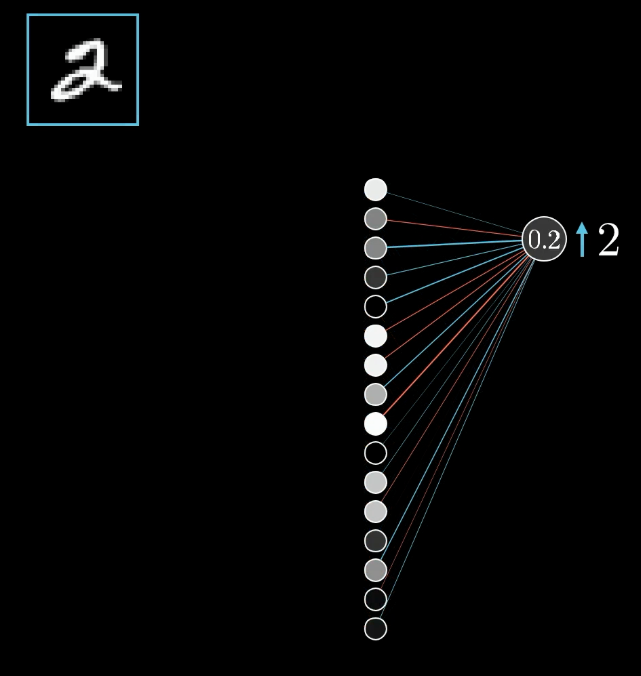

1. Да променим bias-a 
2. Да променим теглата
3. Да променим активациите от предишния слой

# 9. Голямата картина: Епохи и Batch-ове

Сега събираме всичко заедно в един цикъл, наречен **Training Loop**.

1.  **Forward Pass:** Пускаме данни през мрежата -> Получаваме предсказание.
2.  **Compute Loss:** Сравняваме с истината -> Виждаме колко грешим.
3.  **Backward Pass:** Връщаме вината назад -> Изчисляваме Градиентите (накъде да бутнем всяко тегло).
4.  **Optimizer Step:** Променяме теглата малко в правилната посока.

Повтаряме това хиляди пъти (Епохи).

# Параметри на мрежите:

* Архитектура
* Брой слоеве
* Брой неврони във всеки слой
* Активираща функция
* Правило за обновяване на теглата и скорост на обучение (learning rate)
* Размер на "партидата"
* Регуларизации
* И други 

In [124]:
x = np.linspace(-10, 10)

Кога използваме сигмоидна активация?
- Когато искаме изходът да е между 0 и 1 (като вероятност) - използваме сигмоидна функция.
- При бинарна класификация (две класа) в изходния слой.
- Проблем - изчезващ градиент (vanishing gradient) при дълбоки мрежи, производната става много малка за големи или малки стойности на входа. Изходът не е центриран около нулата, което може да забави обучението.

# Активиращи функици (Activation functions)

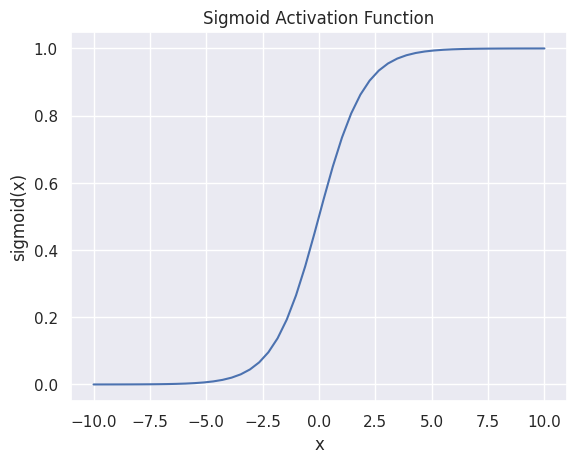

In [125]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show();

Използваме tanh, когато искаме изходът да е между -1 и 1. Изходът е центриран около нулата, което може да ускори обучението. Въпреки това, tanh също страда от проблема с изчезващия градиент при дълбоки мрежи.

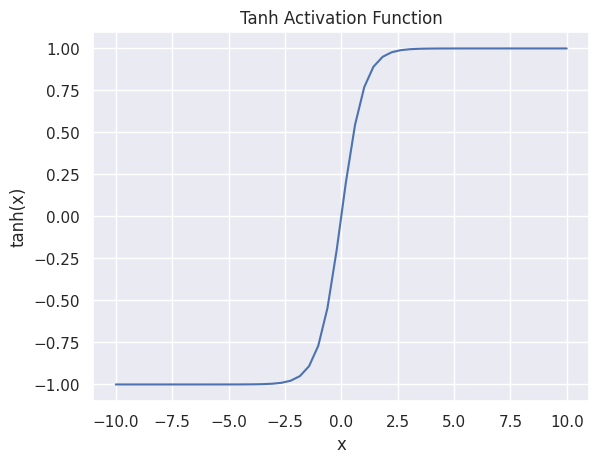

In [126]:
plt.plot(x, np.tanh(x));
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Activation Function')
plt.grid(True)

## Relu семейството

Стандартният избор (Default): Започнете с ReLU за скритите слоеве на почти всяка невронна мрежа 

- Предимства: Изключително бърза за изчисляване. Не страда от изчезващ градиент за положителни стойности.

Недостатъци:

- Dying ReLU (Умиращ ReLU): Ако входът е отрицателен, градиентът е 0 и невронът спира да се учи завинаги.

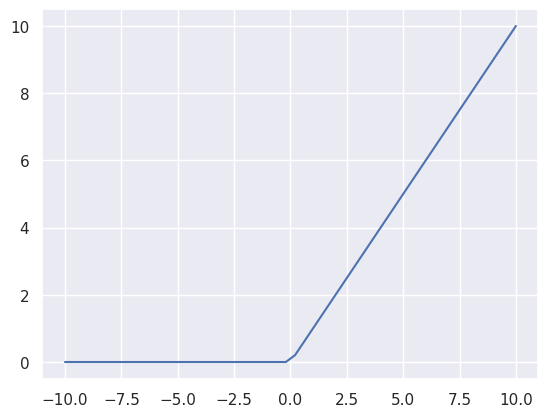

In [127]:
def relu(x):
    """Rectified Linear Unit (ReLU) activation function. Returns max(0, x)"""
    return np.maximum(0, x)
plt.plot(x, relu(x), label='ReLU');

Ако имате проблем с "Dying ReLU": Когато забележите, че голяма част от невроните ви са "мъртви" (изходът им е постоянно 0). Leaky ReLU позволява малък градиент дори за отрицателни стойности, което поддържа невроните активни.

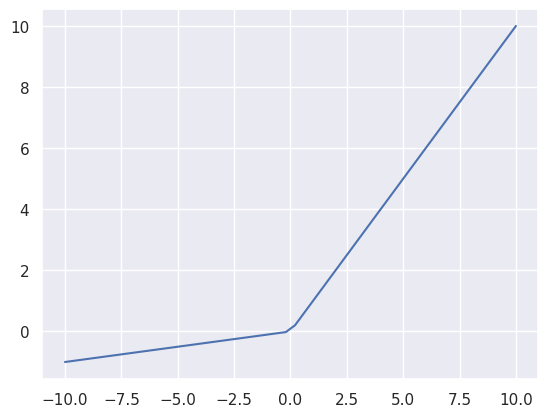

In [128]:
def leaky_relu(x, leakage = 0.1):
        x = np.copy(x)
        x[x < 0] *= leakage
        return x

plt.plot(x, leaky_relu(x));

Гладка версия на ReLU: Softplus е диференцируема навсякъде (за разлика от ReLU, която има "чупка" в 0).

Ограничаване на изхода: Когато искате изходът на даден неврон да бъде строго положителен (например, ако моделът трябва да предскаже стандартно отклонение или дисперсия, които не могат да бъдат отрицателни).

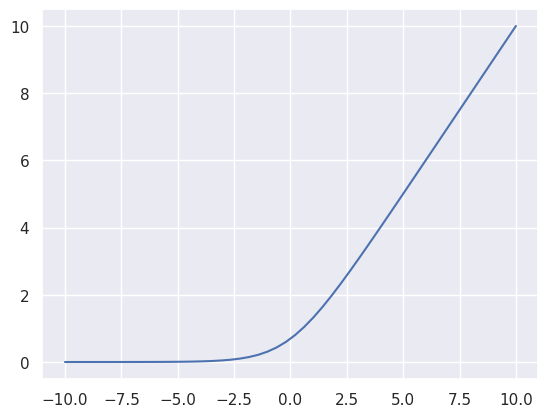

In [129]:
def softplus_function(x):
    return np.log(1 + np.exp(x))

plt.plot(x, softplus_function(x));        

Алтернатива на TanH достига плато много по-бавно от тангенс хиперболичен (tanh)

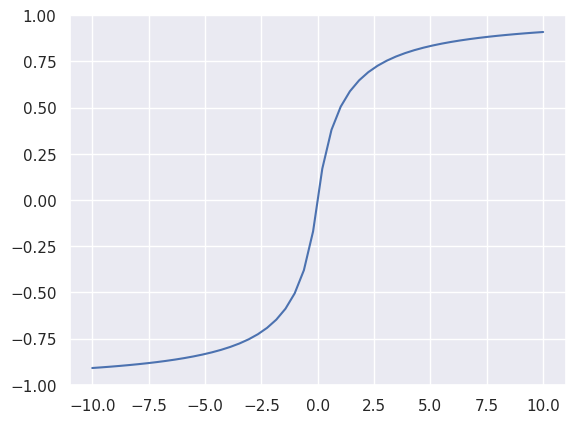

In [130]:
def softsign_function(x):
    return x / (1 + np.abs(x))

plt.plot(x, softsign_function(x));        

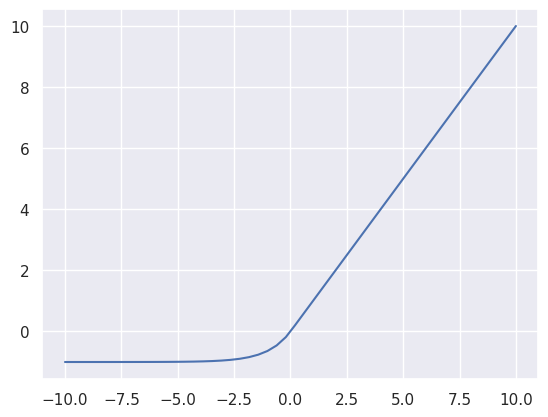

In [131]:
def elu(x, alpha=1):
    x = x.copy()
    neg_indices = x < 0
    x[neg_indices] = alpha * (np.exp(x[neg_indices]) - 1)
    return x

plt.plot(x, elu(x));

## Да ги видим заедно:

In [132]:
def plot_activations():
    x = np.linspace(-5, 5)
    plt.figure(figsize=(12,8))
    plt.plot(x, sigmoid(x))
    plt.plot(x, list(map(np.tanh, x)))
    plt.plot(x, relu(x))
    plt.plot(x, leaky_relu(x))    
    plt.plot(x, softplus_function(x))        
    plt.plot(x, softsign_function(x))        
    plt.plot(x, elu(x))
    plt.legend([
        "sigmoid",
        "tanh",
        "relu",
        "leaky_relu",
        "softplus_function",
        "softsign_function",
        "elu",
    ])

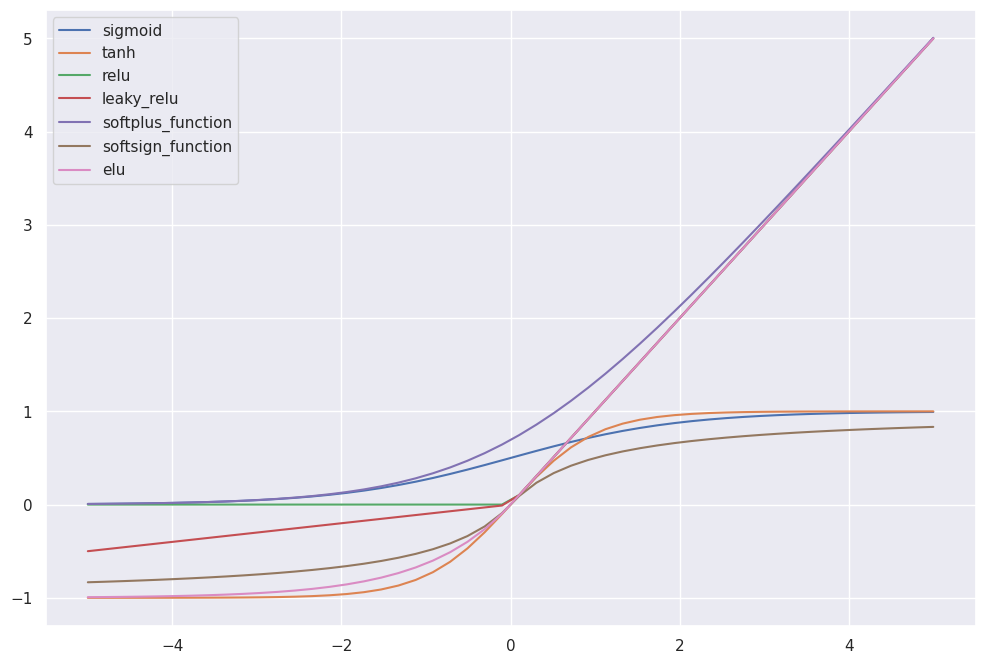

In [133]:
plot_activations()

## Softmax


$$ \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}} $$

* a.k.a. Normalized exponential function 

In [134]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

x = [0.1, 0.2, 0.6, 0.9]
print(x, "\n", softmax(x))

x = [0.1, 0.2, 0.1, 0.9]
print(x, "\n", softmax(x))

[0.1, 0.2, 0.6, 0.9] 
 [0.16723993 0.18482871 0.27573204 0.37219932]
[0.1, 0.2, 0.1, 0.9] 
 [0.18759221 0.20732145 0.18759221 0.41749413]


Можем да използваме softmax за предвиждане на множество класове.

Sigmoid щеше да връща отделна вероятност за всеки възможен клас - подобно на One vs All стратегията.

http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/

## Какво прави Softmax?
Представете си, че невронната мрежа трябва да разпознае какво има на снимка: куче, котка или птица. Преди последния слой мрежата генерира "сурови резултати" (наричани logits), които могат да бъдат всякакви числа (напр. 5.2, -1.0, 3.4). Тези числа са трудни за тълкуване.

Softmax взима тези числа и ги превръща във вероятностно разпределение.

Това означава две неща:

Всички изходни числа стават положителни (между 0 и 1).

Сумата на всички числа е равна точно на 1 (100%).

# Време е да видим нещо по-яко (демо):

http://playground.tensorflow.org/

# Използва "update rule":

$$W_{current} = W_{current} - \alpha \nabla J(W_{current}) $$

Случайно инициализиране на $W$

* Какво ще се случи ако всички тегла са 0 или 1?

Когато пресметнем градиентите, можем да обновяваме теглата чрез "the update rule".

Обаче също има различни разновидности и параметри:

Gradient descent variants
* Batch gradient descent
* Stochastic gradient descent
* Mini-batch gradient descent
* Decaying Learning Rate

Gradient descent optimization algorithms:
* Momentum
* Nesterov accelerated gradient
* Adagrad
* Adadelta
* RMSprop
* Adam
* и др.

# Адаптивни алгоритми

Използват различен скорост за учене за всяка итерация, за всяко от теглата.

Така могат да обновяват с по-голяма стъпка параметри, които са по редки (спарс фичъри) и с по-малки стъпки, тези които се срещат във всяка итерация.

* Adagrad
* Adadelta
* RMSprop

* Започват с `Ada` и можете да ги погледнете в google. 

# Кой алгоритъм за обновяване на теглата да ползваме?

* Ако искате най-добрите резултати, ще трябва да правите grid search с параметрите на всички.
* Adam дава много добри резултати в повечето случаи със стойностите по подразбиране.

[И един хубав туториъл за оптимизационните алгоритми](http://ruder.io/optimizing-gradient-descent).

# 10.  Хиперпараметрите

Сега, след като знаем как работи двигателят, нека седнем в пилотската кабина.
Ние контролираме обучението чрез настройки, наречени **Хиперпараметри**.

Най-важните са:
1.  **Learning Rate (Скорост на учене):** Колко големи крачки правим надолу по хълма?
    - Твърде голям learning rate → Може да пропуснем минимума и да "прескачаме" оптималната стойност
    - Твърде малък learning rate → Ще се движим бавно към минимума и обучението ще отнеме много време
    - Определя с колко голяма стъпка променяме теглата при всяка итерация
2.  **Architecture (Архитектура):** Колко слоеве и неврони имаме?
3.  **Epochs (Епохи):** Колко дълго да учим?
4.  **Activation Function:** Каква нелинейност да ползваме (ReLU, Tanh)?

Нека видим как промяната им променя резултата.

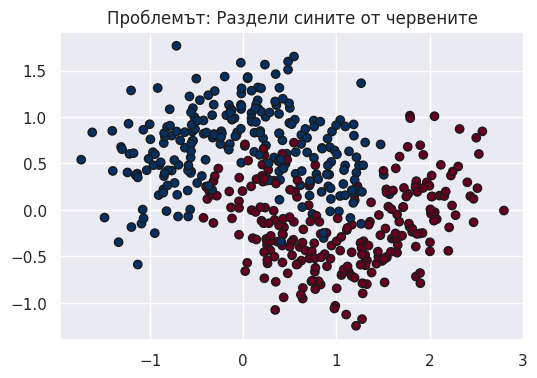

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

warnings.filterwarnings("ignore")

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Функция за рисуване на Decision Boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    if hasattr(model, "predict_proba"):
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap="RdBu")
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="RdBu_r")
    ax.set_title(title)

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu_r", edgecolors='k')
plt.title("Проблемът: Раздели сините от червените")
plt.show()

## Експеримент 1: Learning Rate (Размер на крачката)

Това е най-важният параметър.
* **Твърде малък (0.0001):** Мрежата е "плаха". Учи твърде бавно и може да спре преди да е стигнала целта.
* **Твърде голям (1.0):** Мрежата е "хиперактивна". Скача напред-назад и не може да уцели дъното на долината.
* **Точният (0.01 - 0.1):** Златната среда.

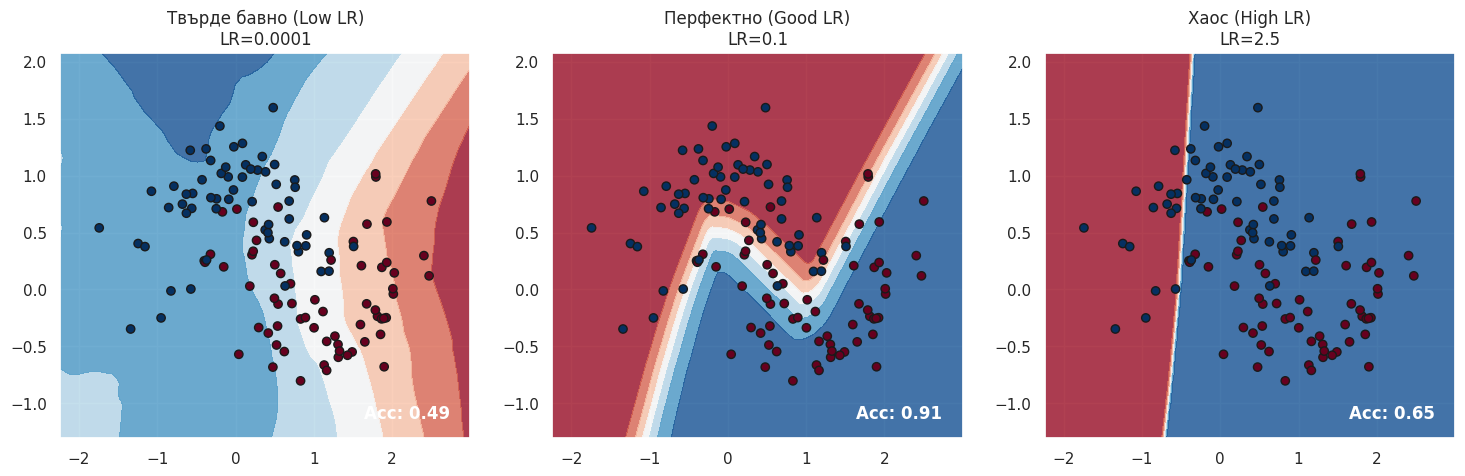

In [136]:
# Три модела с различни скорости
lrs = [0.0001, 0.1, 2.5] # Малък, Добър, Огромен
titles = ["Твърде бавно (Low LR)", "Перфектно (Good LR)", "Хаос (High LR)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, lr in enumerate(lrs):
    # Създаваме MLP (Multi-Layer Perceptron)
    # solver='sgd' (Stochastic Gradient Descent) за да видим ефекта на LR
    # max_iter=50 - максимален брой итерации 
    model = MLPClassifier(hidden_layer_sizes=(100, 100), 
                          learning_rate_init=lr, 
                          solver='sgd', 
                          max_iter=50, random_state=42)
    
    model.fit(X_train, y_train)
    
    # Визуализация
    plot_decision_boundary(model, X_test, y_test, axes[i], f"{titles[i]}\nLR={lr}")
    axes[i].text(0.95, 0.05, f"Acc: {model.score(X_test, y_test):.2f}", 
                 transform=axes[i].transAxes, ha='right', color='white', fontweight='bold')

plt.show()

## Експеримент 2: Архитектура 

Колко умна трябва да е мрежата?
* **1 неврон (Линеен модел):** Може да чертае само права линия. Не може да реши проблема с луните.
* **Малка мрежа (10 неврона):** Опитва се да огъне линията, но е ъгловата.
* **Дълбока мрежа (2 слоя по 100 неврона):** Може да моделира сложни извивки и да обгради данните перфектно.

Това се нарича **Universal Approximation Theorem** – с достатъчно неврони можем да нарисуваме всякаква форма.

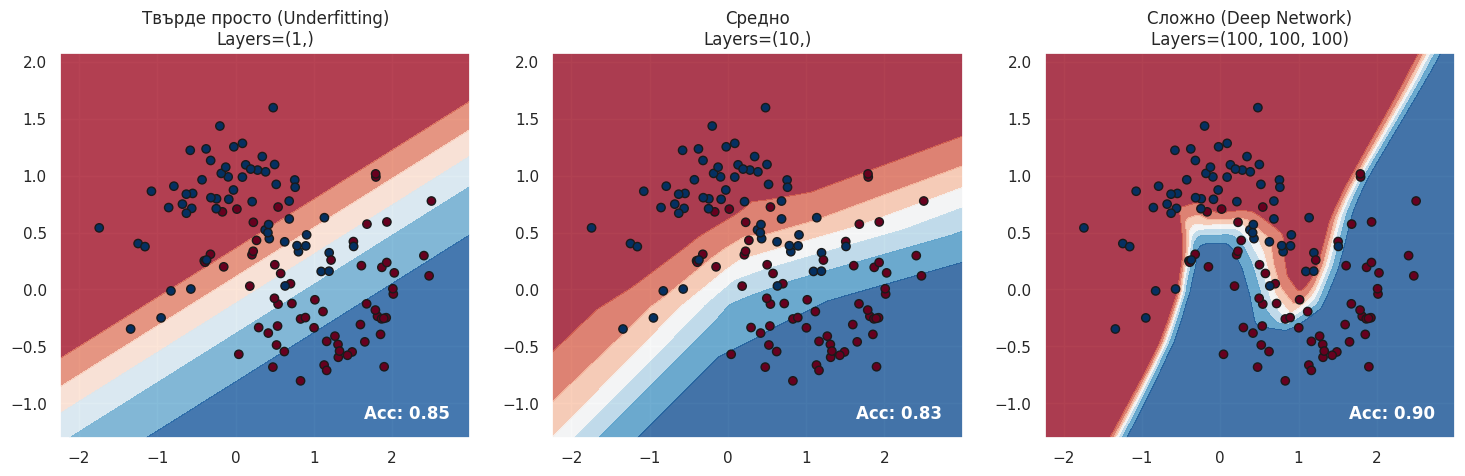

In [137]:
configs = [
    (1,),               # 1 слой с 1 неврон (Почти линейна регресия)
    (10,),              # 1 слой с 10 неврона
    (100, 100, 100)     # 3 слоя по 100 неврона (Deep Learning)
]
titles_arch = ["Твърде просто (Underfitting)", "Средно", "Сложно (Deep Network)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, hidden in enumerate(configs):
    model = MLPClassifier(hidden_layer_sizes=hidden, 
                          activation='relu', 
                          max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    
    plot_decision_boundary(model, X_test, y_test, axes[i], f"{titles_arch[i]}\nLayers={hidden}")
    axes[i].text(0.95, 0.05, f"Acc: {model.score(X_test, y_test):.2f}", 
                 transform=axes[i].transAxes, ha='right', color='white', fontweight='bold')

plt.show()

## Експеримент 3: Епохи и Overfitting

Какво става, ако оставим мощна мрежа да учи твърде дълго върху малко данни?
Тя започва да **запаметява** (memorize) вместо да учи принципи.

Тя ще започне да прави странни форми, само за да обхване няколко единични "шумни" точки (outliers).

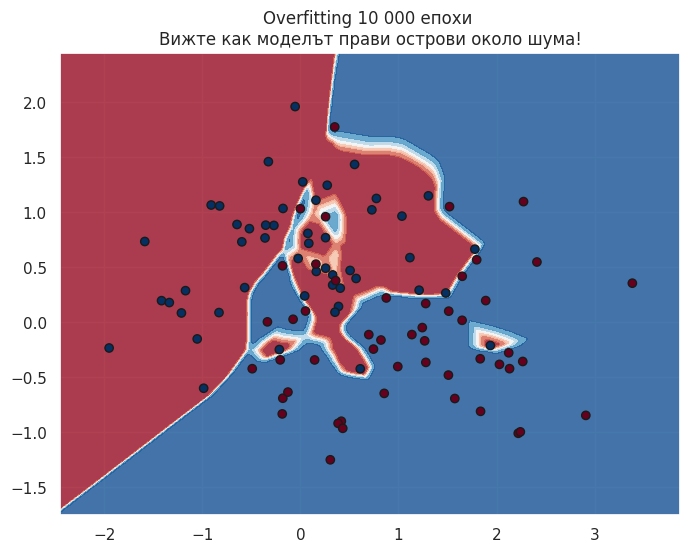

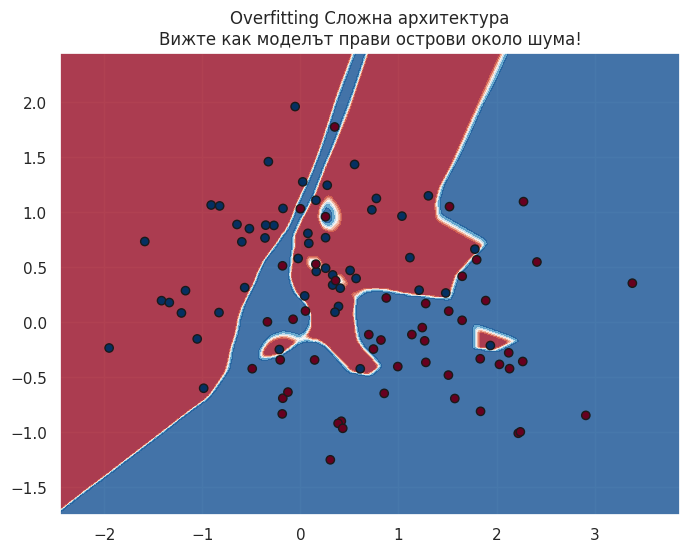

In [138]:
# Тук използваме малко данни с много шум, за да провокираме overfitting
X_noisy, y_noisy = make_moons(n_samples=100, noise=0.5, random_state=42)

# Много сложен модел 
# Архитектура - две скрити слоя с по 100 неврона
# Брой епохи - 10000

model_overfit = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10_000, random_state=42)
model_overfit.fit(X_noisy, y_noisy)

plt.figure(figsize=(8, 6))
plot_decision_boundary(model_overfit, X_noisy, y_noisy, plt.gca(), "Overfitting 10 000 епохи \nВижте как моделът прави острови около шума!")
plt.show()


model_overfit_architecture = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, random_state=42)
model_overfit_architecture.fit(X_noisy, y_noisy)

plt.figure(figsize=(8, 6))
plot_decision_boundary(model_overfit_architecture, X_noisy, y_noisy, plt.gca(), "Overfitting Сложна архитектура\nВижте как моделът прави острови около шума!")
plt.show()

## Експеримент 4: Активационни функции

Активационната функция е това, което решава дали един неврон да "светне" или не. Но по-важното е, че тя вкарва **нелинейност**.

Без активационна функция (или с линейна такава), без значение колко слоеве имате, вашата мрежа е просто една голяма Линейна Регресия. Тя не може да огъва пространството.

Нека тестваме три варианта:
1.  **Identity (Linear):** Нищо не прави. Входът е равен на изхода. (Очакваме провал на кръговете).
2.  **Tanh (Hyperbolic Tangent):** Смачква числата между -1 и 1. Гладка крива.
3.  **ReLU (Rectified Linear Unit):** Най-популярната в момента. Ако числото е положително -> запазва го. Ако е отрицателно -> става 0.

# 11. Линейна регресия vs. Невронна мрежа

Най-добрият начин да разберем силата на Невронните мрежи е да ги пуснем в битка срещу класиката – **Линейна регресия**.

Ще използваме проблем, който не може да бъде решен с права линия: **Кръгове (Circles)**.
* **Сините точки** са вътре.
* **Червените точки** са отвън.

Може ли една права линия да ги раздели? Нека видим.

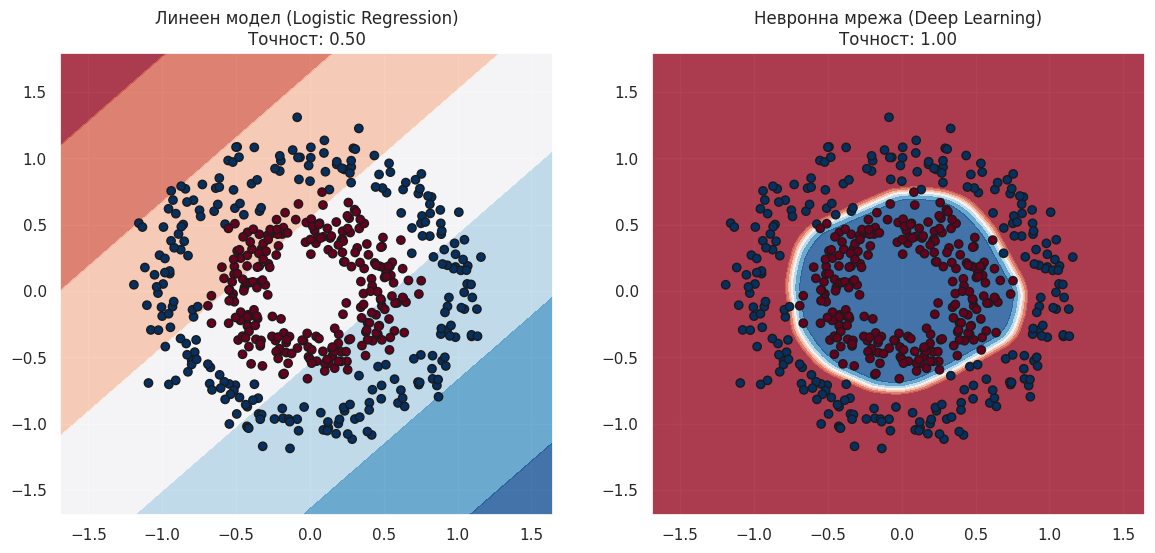

In [139]:
from sklearn.linear_model import LogisticRegression # Линеен класификатор
from sklearn.neural_network import MLPClassifier    # Невронна мрежа

# 1. Създаваме трудни данни (Кръгове)
X_circles, y_circles = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# 2. Обучаваме Линеен модел (Логистична регресия)
# Това е еквивалент на Невронна мрежа без скрити слоеве (само Input -> Output)
linear_model = LogisticRegression()
linear_model.fit(X_circles, y_circles)

# 3. Обучаваме Невронна мрежа (С скрити слоеве)
# 2 скрити слоя с по 64 неврона и ReLU активация
nn_model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', max_iter=1000, random_state=42)
nn_model.fit(X_circles, y_circles)

# 4. Визуализация на битката
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Линейна регресия
plot_decision_boundary(linear_model, X_circles, y_circles, axes[0], 
                       f"Линеен модел (Logistic Regression)\nТочност: {linear_model.score(X_circles, y_circles):.2f}")

# Невронна мрежа
plot_decision_boundary(nn_model, X_circles, y_circles, axes[1], 
                       f"Невронна мрежа (Deep Learning)\nТочност: {nn_model.score(X_circles, y_circles):.2f}")

plt.show()

Линейната регресия (и Логистичната регресия) имат едно фундаментално ограничение:
$$y = wx + b$$
Това е уравнение на **права линия** (или плоскост в 3D).

Колкото и да въртим параметрите $w$ и $b$, ние можем само да местим и въртим една права черта.
Няма как с една права ножица да изрежем кръгчето от средата на листа, без да засегнем краищата.

**Невронната мрежа печели, защото:**
Скритите слоеве и **Активационните функции (ReLU)** огъват пространството.
Всеки неврон добавя нова "чупка" в линията, докато накрая се получи затворен кръг.

## Експеримент 4: Активационни функции

Активационната функция е това, което решава дали един неврон да "светне" или не. Но по-важното е, че тя вкарва **нелинейност**.

Без активационна функция (или с линейна такава), без значение колко слоеве имате, вашата мрежа е просто една голяма Линейна Регресия. Тя не може да огъва пространството.

Нека тестваме три варианта:
1.  **Identity (Linear):** Нищо не прави. Входът е равен на изхода. (Очакваме провал на кръговете).
2.  **Tanh (Hyperbolic Tangent):** Смачква числата между -1 и 1. Гладка крива.
3.  **ReLU (Rectified Linear Unit):** Най-популярната в момента. Ако числото е положително -> запазва го. Ако е отрицателно -> става 0.

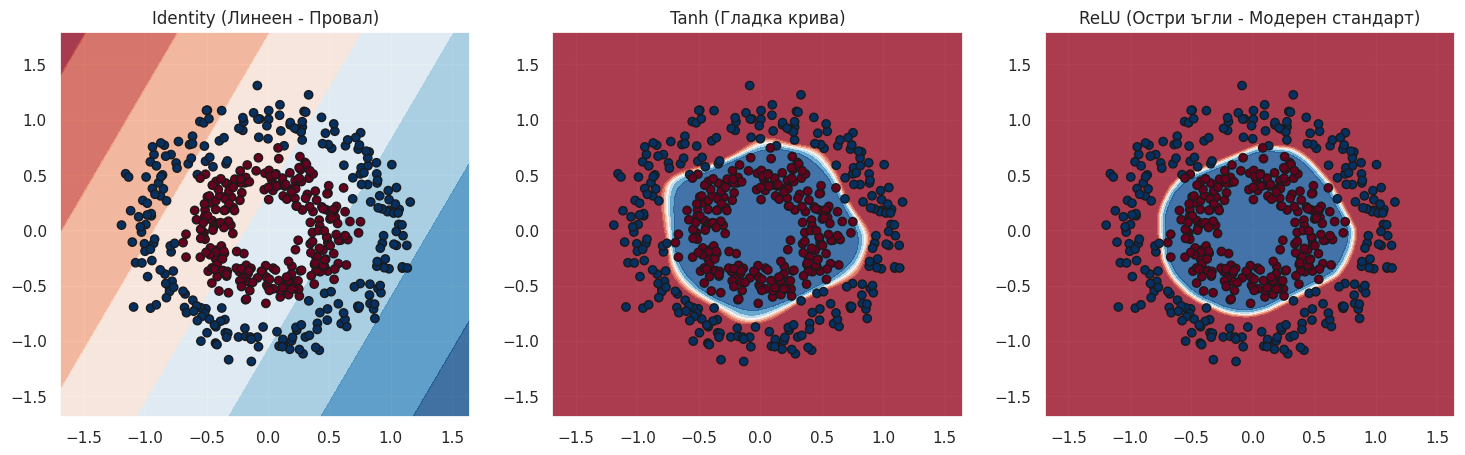

In [140]:
activations = ['identity', 'tanh', 'relu']
titles_act = ["Identity (Линеен - Провал)", "Tanh (Гладка крива)", "ReLU (Остри ъгли - Модерен стандарт)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, act in enumerate(activations):
    # Фиксираме архитектурата, сменяме само функцията
    model = MLPClassifier(hidden_layer_sizes=(100, 100), 
                          activation=act, 
                          max_iter=1000, 
                          learning_rate_init=0.01,
                          random_state=42)
    
    model.fit(X_circles, y_circles)
    
    plot_decision_boundary(model, X_circles, y_circles, axes[i], f"{titles_act[i]}")

plt.show()

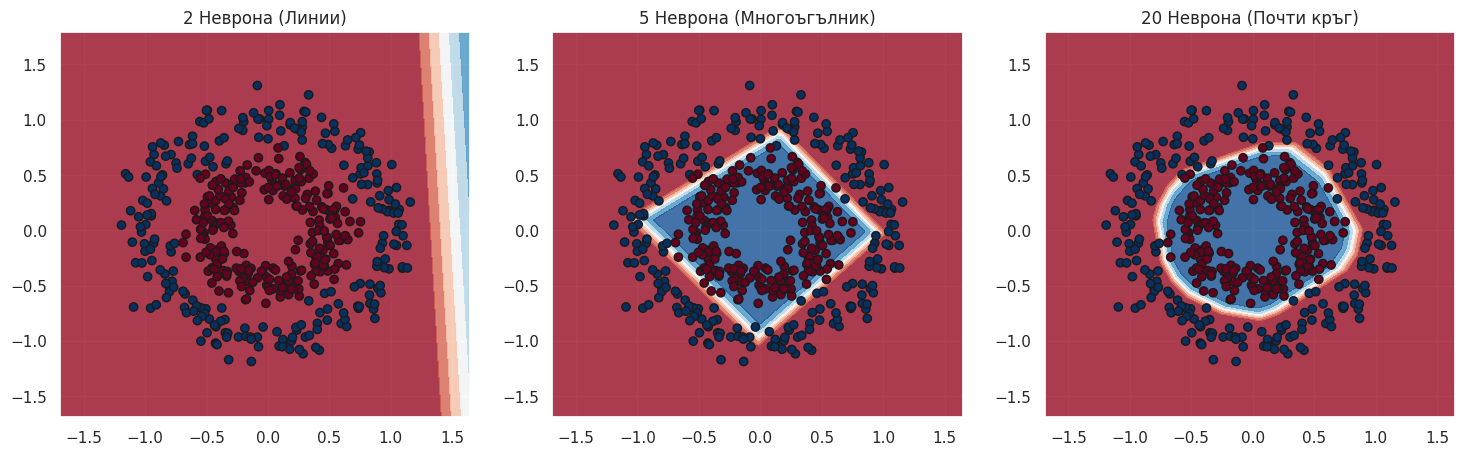

In [141]:
neuron_counts = [2, 5, 20] 
titles_relu = ["2 Неврона (Линии)", "5 Неврона (Многоъгълник)", "20 Неврона (Почти кръг)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, neurons in enumerate(neuron_counts):
    # Важно: Само 1 слой с малко неврони + ReLU
    model = MLPClassifier(hidden_layer_sizes=(neurons,), 
                          activation='relu', 
                          max_iter=2000, 
                          learning_rate_init=0.01,
                          random_state=42)
    
    model.fit(X_circles, y_circles)
    
    plot_decision_boundary(model, X_circles, y_circles, axes[i], f"{titles_relu[i]}")

plt.show()

# 12. Професионалният подход: GridSearch

Досега ние "налучквахме" параметрите ръчно. Пробвахме един Learning Rate, после друг брой слоеве... Това е бавно и неефективно.

В практиката използваме **Grid Search (Търсене в решетка)**.
1.  Дефинираме списък с всички настройки, които искаме да пробваме.
2.  Компютърът тренира десетки модели с всяка възможна комбинация.
3.  Накрая ни казва: *"Ето тази комбинация даде най-висок резултат!"*

Това отнема време за изчисление, но гарантира най-добрия модел.

Стартиране на GridSearch... (Това може да отнеме малко време)
Всички резултати от GridSearch:


params  mean_test_score  \
0   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.988000   
1   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.991992   
2   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.988000   
3   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.983984   
4   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.983996   
5   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.975988   
6   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.987988   
7   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.986016   
8   {'activation': 'tanh', 'hidden_layer_sizes': (...         0.897903   
9   {'activation': 'relu', 'hidden_layer_sizes': (...         0.986004   
10  {'activation': 'relu', 'hidden_layer_sizes': (...         0.985992   
11  {'activation': 'relu', 'hidden_layer_sizes': (...         0.991980   
12  {'activation': 'relu', 'hidden_layer_sizes': (...         0.989996   
13  {'activation': 'relu', 'hidden_layer_sizes': (...         0.986004   
14  {'activation': 'relu', 'hidden_layer_sizes': (...         0.967980   
15  {'activation': 'relu', 'hidden_layer_sizes': (...         0.989984   
16  {'activation': 'relu', 'hidden_layer_sizes': (...         0.988000   
17  {'activation': 'relu', 'hidden_layer_sizes': (...         0.983996   

    std_test_score  rank_test_score  
0         0.004889                5  
1         0.002857                1  
2         0.004889                5  
3         0.007520               15  
4         0.007478               13  
5         0.008511               16  
6         0.004933                8  
7         0.007456                9  
8         0.039482               18  
9         0.012300               10  
10        0.005671               12  
11        0.007517                2  
12        0.002840                3  
13        0.007462               10  
14        0.010261               17  
15        0.005697                4  
16        0.004889                5  
17        0.002849               13


--- НАМЕРЕНИ НАЙ-ДОБРИ ПАРАМЕТРИ ---
Най-добър резултат (Accuracy): 0.99
Най-добра конфигурация:
{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}


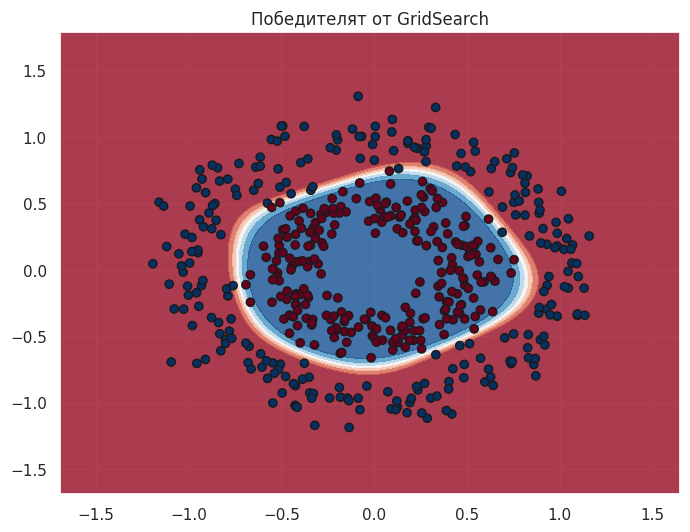

In [142]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
# 1. Дефинираме "Решетката" от параметри (Менюто с опции)
parameter_space = {
    'hidden_layer_sizes': [(50,), (100, 100), (50, 50, 50)], # Различни архитектури
    'activation': ['tanh', 'relu'],                          # Различни функции
    'learning_rate_init': [0.001, 0.01, 0.1],                # Различни скорости
}

# 2. Създаваме базовия модел
mlp = MLPClassifier(max_iter=1000, random_state=42)

# 3. Стартираме търсенето (n_jobs=-1 използва всички ядра на процесора)
print("Стартиране на GridSearch... (Това може да отнеме малко време)")
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_circles, y_circles) # Използваме кръговете
# Всички резултати
print("Всички резултати от GridSearch:")
results_df = pd.DataFrame(clf.cv_results_)
display(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]) 
# 4. Резултатите
print("\n--- НАМЕРЕНИ НАЙ-ДОБРИ ПАРАМЕТРИ ---")
print(f"Най-добър резултат (Accuracy): {clf.best_score_:.2f}")
print("Най-добра конфигурация:")
print(clf.best_params_)

# 5. Визуализация на победителя
best_model = clf.best_estimator_
plt.figure(figsize=(8, 6))
plot_decision_boundary(best_model, X_circles, y_circles, plt.gca(), "Победителят от GridSearch")
plt.show()

# В допълнение: 

Многослойният персептрон (MLP) е само един от многобройните видове невронни мрежи, които съществуват. Някои основни други видове мрежи са: 
- **Конвулюционни невронни мрежи (CNNs)** - основният тип невронни мрежи за работа с изображения.
- **Рекурентни невронни мрежи (RNNs)** - за обработка на последователни данни - текстове, времеви редове и др. 
- **Трансформъри (Transformers)** - Изключително сложни мрежи, в основата на съвременните модели за машинен превод и генериране на текст (като GPT-3 и ChatGPT).

За имплементацията и използването на невронни мрежи в python, обикновено не се използва `sklearn`, а някои от библиотеките за дълбоко обучение (*deep learning*): 
- [PyTorch](https://pytorch.org/)
- [TensoFlow](https://www.tensorflow.org/)
- [Hugging Face](https://huggingface.co/models)
-  др.

# Задача 1: "Моден дизайнер" (Fashion MNIST)

**Цел:** Да упражним борбата с Overfitting и настройката на хиперпараметри.

**Описание:**
Ще работим с дейтасет **Fashion MNIST**, който съдържа 70,000 малки изображения (28x28 пиксела) на 10 вида дрехи (тениски, панталони, обувки и др.). Това е по-сложна версия на цифрите.

**Вашата задача:**
1.  Разгледайте първото изображение, за да разберете с какви данни работите.
2.  **Скалирайте данните!** (Пикселите са от 0 до 255, а невронната мрежа иска от 0 до 1).
3.  Довършете кода на модела, като изберете:
    * Подходяща архитектура (`hidden_layer_sizes`).
    * Скорост на учене (`learning_rate_init`).
4.  Целта е да постигнете **над 88% точност** на тестовите данни.

**Подсказка:** Ако точността на Train е 1.00 (100%), а на Test е 0.85, моделът ви "зубри". Опитайте да намалите невроните или използвайте `early_stopping=True`.

Зареждане на Fashion MNIST... (моля изчакайте)


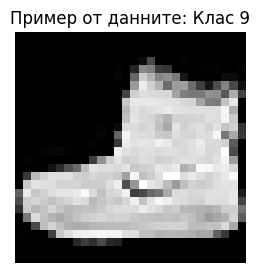

Размер на входа (Input shape): (70000, 784) -> 784 пиксела на картинка


In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 1. Зареждане на данните
print("Зареждане на Fashion MNIST... (моля изчакайте)")
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False, parser='auto')

# Взимаме първия пример (ред 0) и го "сгъваме" обратно в картинка 28x28
first_image = X[0].reshape(28, 28)

plt.figure(figsize=(3, 3))
plt.imshow(first_image, cmap='gray')
plt.title(f"Пример от данните: Клас {y[0]}")
plt.axis('off')
plt.show()

print(f"Размер на входа (Input shape): {X.shape} -> 784 пиксела на картинка")


In [ ]:
# 3. ПОДГОТОВКА (Вашият код тук)
# TODO: Скалирайте пикселите да са между 0 и 1 (в момента са 0-255)
X_scaled = X   # <--- ПРОМЕНЕТЕ ТОВА (Hint: делете на 255.0)

# Разделяне на Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

# 4. ДЕФИНИРАНЕ НА МОДЕЛА (Попълнете липсващото)
model = MLPClassifier(
    hidden_layer_sizes=(_______),  # TODO: Колко слоя и колко неврона? (напр. 100, 50)
    activation='relu',
    solver='adam',
    learning_rate_init=_______,    # TODO: Изберете скорост (напр. 0.001)
    max_iter=300,
    early_stopping=True,           # Помага срещу пренаучаване
    random_state=42,
    verbose=True
)

# Обучение
print("\nСтартиране на обучението...")
# model.fit(X_train, y_train) <--- Разкоментирайте, когато сте готови!

# Оценка
# print(f"Train Acc: {model.score(X_train, y_train):.4f}")
# print(f"Test Acc:  {model.score(X_test, y_test):.4f}")

# ✍️ Задача 2: Лицата (Къде MLP се проваля?)

**Цел:** Да видим защо за сложни изображения (като снимки на хора) стандартните невронни мрежи (MLP) не са идеални.

**Описание:**
Ще използваме дейтасет **LFW (Labeled Faces in the Wild)**.
* Всеки пиксел е характеристика.
* Размерът на входа е много по-голям от MNIST.

**Вашата задача:**
1.  Пуснете кода и вижте картинката.
2.  Обучете модела.
3.  Сравнете резултата на `Train` и `Test`.
    * Голяма разлика (напр. 99% на Train срещу 60% на Test) означава **Overfitting**.
    * Защо се получава така? Липсва ли на модела разбиране за "структура" (очи, нос, уста)?

Зареждане на лица (LFW)...


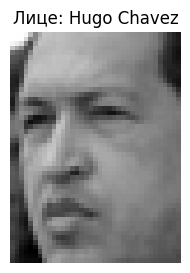

Всеки вход е вектор с дължина 1850 (Картинка 50x37)


In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

# 1. Зареждане на данните
print("Зареждане на лица (LFW)...")
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X_faces = lfw_people.data
y_faces = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape

# 2. 👀 ВИЗУАЛИЗАЦИЯ
# Тук картинката не е квадратна, затова използваме h и w от оригиналните данни
plt.figure(figsize=(3, 3))
plt.imshow(X_faces[0].reshape(h, w), cmap='gray')
plt.title(f"Лице: {target_names[y_faces[0]]}")
plt.axis('off')
plt.show()

print(f"Всеки вход е вектор с дължина {X_faces.shape[1]} (Картинка {h}x{w})")

In [ ]:
# Скалиране (LFW обикновено е добре, но за сигурност)
X_faces = X_faces / 255.0

# Разделяне
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_faces, y_faces, test_size=0.25, random_state=42)

# 3. МОДЕЛЪТ 
model_faces = MLPClassifier(
    hidden_layer_sizes=(1024, 512), # Огромна мрежа
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# print("Обучение на лицата...")
# model_faces.fit(X_train_f, y_train_f)

# print(f"Train Score: {model_faces.score(X_train_f, y_train_f):.2f}")
# print(f"Test Score: {model_faces.score(X_test_f, y_test_f):.2f}")